# CNN - Handwritten Digit Classification  

 - The MNIST data is a database of handwritten digits from 0 to 9. The database contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Your task is to create a CNN model for identifying the digit from the handwritten images. 

Please perform the following tasks

- Load the database to variable named digit_mnist using the Keras inbuilt datasets (digit_mnist = keras.datasets.mnist)
- Import data to create X_train_full, y_train_full, X_test and y_test variables
- Reshape the independent (X) data
- Normalize the data
- Create a validation set of 6000 images
- Create a CNN model (Model_A) with a Conv layer of filters = 32, kernel_size = (3, 3), strides=1, padding='valid', a Max pooling layer of 2 by 2 window and two dense layers with 200 and 100 neurons
- Compile and train the model for 60 epochs
- Plot the loss and accuracy against epoch
- Evaluate the model accuracy on the test dataset
- Create another model (model_B) with number of filter =64
- Compare the performance and execution time for Model_A and Model_B


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist = keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = digit_mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## Data Reshape - Preprocessing

 - For CNN: needing a 3-D array as input
 - Height, Width, Channels
 - Currently X_data is in 2-D aaray format and no dimension for Channels
 - by default CNN required 3 Dimensional layers

In [4]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1)) # 1 stands for Channel

## Data Normalization
 -  to make data normalize on same scale

In [5]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

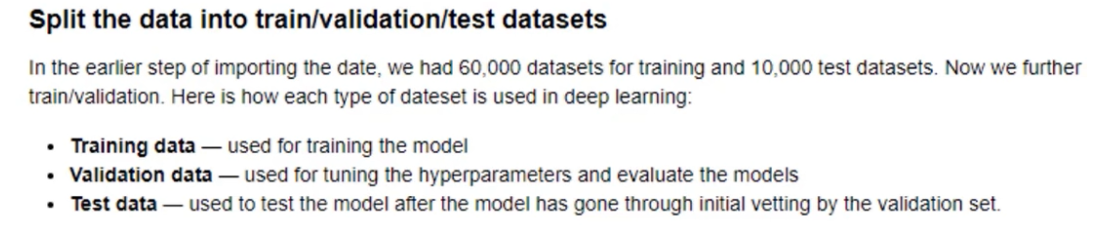

In [6]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

## Create the Model Architecture

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

## Model Structuring & Compilation

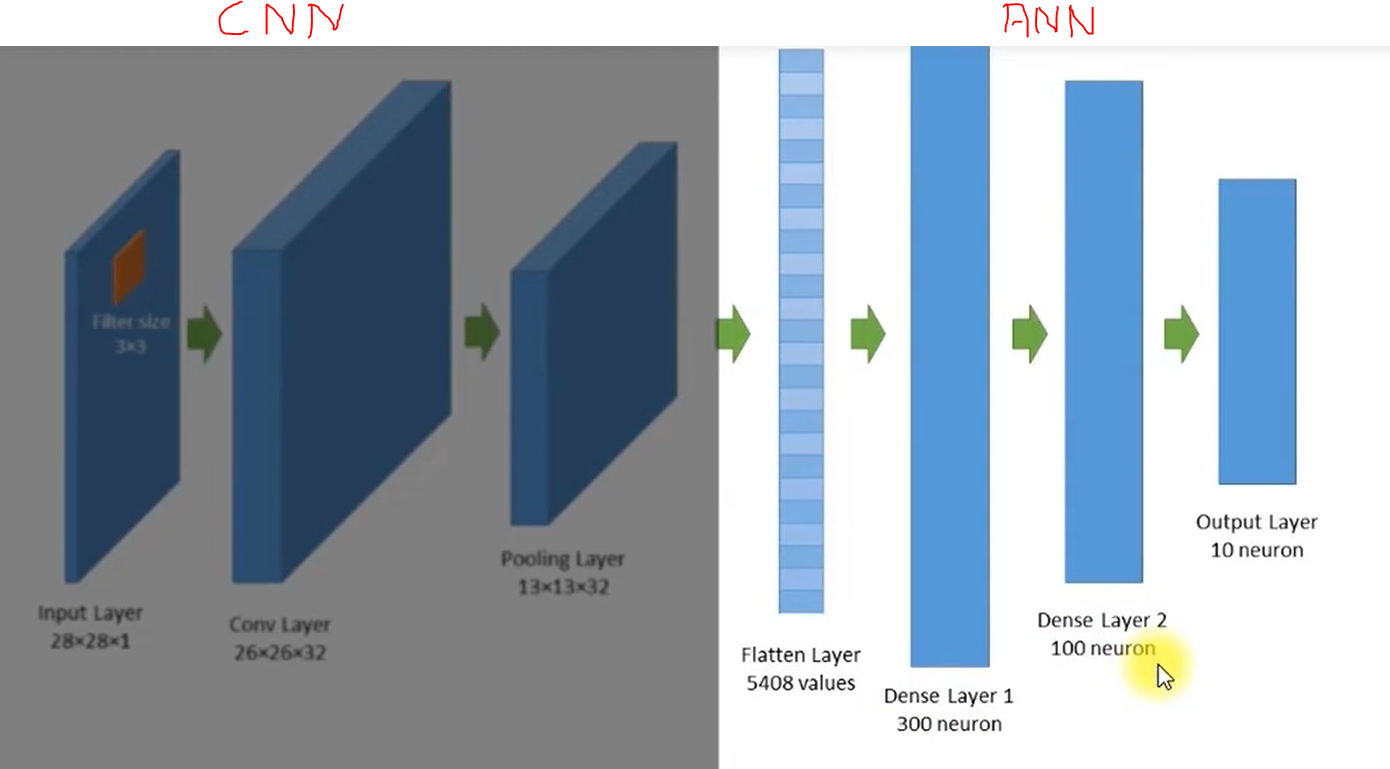

#### Model A -  With Pooling -  Filters 32

In [8]:
# CNN
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="valid", activation="relu", input_shape=(28,28,1)))
# kernel_size = filter_size
model_a.add(keras.layers.MaxPooling2D((2,2)))

# ANN
model_a.add(keras.layers.Flatten()) #3D to 2D
model_a.add(keras.layers.Dense(200, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

#### Model B -  With Pooling -  Filters 64

In [18]:
# CNN
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="valid", activation="relu", input_shape=(28,28,1)))
# kernel_size = filter_size
model_b.add(keras.layers.MaxPooling2D((2,2)))

# ANN
model_b.add(keras.layers.Flatten()) #3D to 2D
model_b.add(keras.layers.Dense(200, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               1081800   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,103,230
Trainable params: 1,103,230
Non-trainable params: 0
______________________________________________

In [19]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               2163400   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 2,185,150
Trainable params: 2,185,150
Non-trainable params: 0
____________________________________________

# Compiling and Training the NN Model

In [12]:
model_a.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [20]:
model_b.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [14]:
checkpoint_cb_a = keras.callbacks.ModelCheckpoint("early_stop_best_model_a.h5", save_best_only=True)

In [21]:
checkpoint_cb_b = keras.callbacks.ModelCheckpoint("early_stop_best_model_b.h5", save_best_only=True)

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [17]:
model_history_a = model_a.fit(X_train,y_train, epochs=60, batch_size=64, validation_data = (X_valid,y_valid), 
                          callbacks=[checkpoint_cb_a,early_stopping_cb])

Epoch 1/60
844/844 [==============================] - 30s 34ms/step - loss: 0.7421 - accuracy: 0.8111 - val_loss: 0.2898 - val_accuracy: 0.9142
Epoch 2/60
844/844 [==============================] - 28s 33ms/step - loss: 0.2716 - accuracy: 0.9196 - val_loss: 0.2196 - val_accuracy: 0.9388
Epoch 3/60
844/844 [==============================] - 28s 33ms/step - loss: 0.2109 - accuracy: 0.9370 - val_loss: 0.1771 - val_accuracy: 0.9485
Epoch 4/60
844/844 [==============================] - 29s 34ms/step - loss: 0.1731 - accuracy: 0.9474 - val_loss: 0.1442 - val_accuracy: 0.9580
Epoch 5/60
844/844 [==============================] - 28s 34ms/step - loss: 0.1468 - accuracy: 0.9555 - val_loss: 0.1285 - val_accuracy: 0.9612
Epoch 6/60
844/844 [==============================] - 29s 34ms/step - loss: 0.1278 - accuracy: 0.9616 - val_loss: 0.1176 - val_accuracy: 0.9655
Epoch 7/60
844/844 [==============================] - 28s 34ms/step - loss: 0.1135 - accuracy: 0.9664 - val_loss: 0.1057 - val_accuracy:

In [22]:
model_history_b = model_b.fit(X_train,y_train, epochs=60, batch_size=64, validation_data = (X_valid,y_valid), 
                          callbacks=[checkpoint_cb_b,early_stopping_cb])

Epoch 1/60
844/844 [==============================] - 45s 52ms/step - loss: 0.6928 - accuracy: 0.8167 - val_loss: 0.2840 - val_accuracy: 0.9150
Epoch 2/60
844/844 [==============================] - 43s 51ms/step - loss: 0.2697 - accuracy: 0.9203 - val_loss: 0.2239 - val_accuracy: 0.9355
Epoch 3/60
844/844 [==============================] - 43s 51ms/step - loss: 0.2126 - accuracy: 0.9364 - val_loss: 0.1796 - val_accuracy: 0.9490
Epoch 4/60
844/844 [==============================] - 43s 51ms/step - loss: 0.1759 - accuracy: 0.9470 - val_loss: 0.1514 - val_accuracy: 0.9567
Epoch 5/60
844/844 [==============================] - 43s 51ms/step - loss: 0.1504 - accuracy: 0.9544 - val_loss: 0.1347 - val_accuracy: 0.9615
Epoch 6/60
844/844 [==============================] - 44s 52ms/step - loss: 0.1310 - accuracy: 0.9604 - val_loss: 0.1190 - val_accuracy: 0.9645
Epoch 7/60
844/844 [==============================] - 44s 52ms/step - loss: 0.1165 - accuracy: 0.9657 - val_loss: 0.1060 - val_accuracy:

#### Train_Accuracy & Validation_Accuracy 

##### Model_A
 - accuracy: 0.9965
 - val_accuracy: 0.9833
    
##### Model_B
 - accuracy: 0.9982
 - val_accuracy: 0.9828

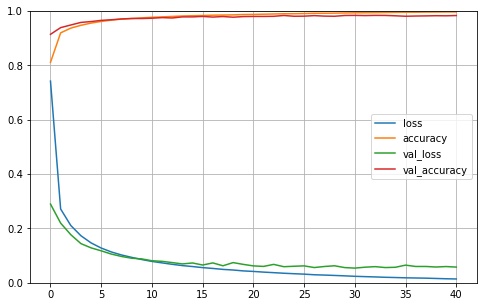

In [23]:
pd.DataFrame(model_history_a.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

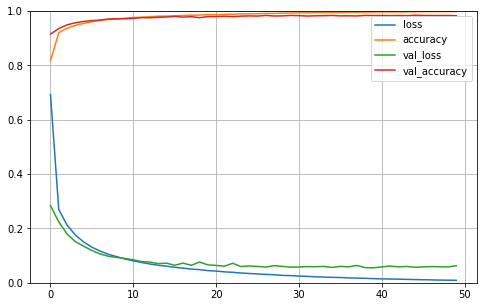

In [24]:
pd.DataFrame(model_history_b.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Test_Accuracy

In [25]:
# Model A
a = model_a.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0565 - accuracy: 0.9805


In [26]:
# Model_B
b = model_b.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0601 - accuracy: 0.9823


#### Predict classes on Unseen Dataset

##### Model A

In [27]:
X_new = X_test[:3]

In [28]:
y_test[:3] # actual_y

array([7, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


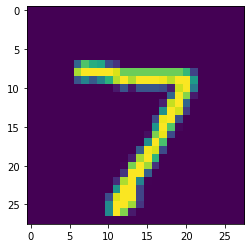

In [29]:
print(plt.imshow(X_test[0].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


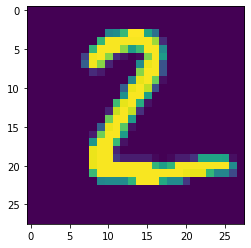

In [31]:
print(plt.imshow(X_test[1].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


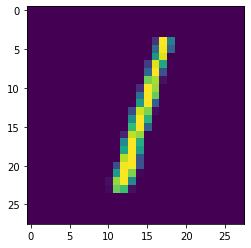

In [32]:
print(plt.imshow(X_test[2].reshape((28,28))))

In [33]:
# probability of each class
y_prob = model_a.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
# predicting class
y_pred = model_a.predict_classes(X_new)
y_pred

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1], dtype=int64)

##### Model B

In [35]:
# probability of each class
y_prob_b = model_b.predict(X_new)
y_prob_b.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
# predicting class
y_pred_b = model_b.predict_classes(X_new)
y_pred_b

array([7, 2, 1], dtype=int64)